In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers import Input
from tensorflow.keras.layers import InputLayer

In [2]:
data_train = image_dataset_from_directory('A:/train/train_sound',
                                             subset='training',
                                             seed=27,
                                             batch_size=100,
                                             validation_split=0.15,
                                             image_size=(90, 3),
                                             color_mode = 'grayscale')

Found 1117 files belonging to 2 classes.
Using 950 files for training.


In [3]:
data_validation = image_dataset_from_directory('A:/train/train_sound',
                                             subset='validation',
                                             seed=27,
                                             batch_size=100,
                                             validation_split=0.15,
                                             image_size=(90, 3),
                                             color_mode = 'grayscale')

Found 1117 files belonging to 2 classes.
Using 167 files for validation.


In [4]:
data_test = image_dataset_from_directory('A:/train/test',
                                         batch_size=100,
                                         image_size = (90, 3),
                                         color_mode = 'grayscale')

Found 139 files belonging to 2 classes.


In [5]:
NM_model = tf.keras.models.load_model("model.h5")

In [7]:
NM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 89, 2, 128)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 1, 128)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 44, 1, 128)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5632)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               721024    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                      

In [6]:
first_layers = NM_model.layers[0]
second_layers = NM_model.layers[1]
tri_layers = NM_model.layers[2]
chet_layers = NM_model.layers[3]
pyat_layers = NM_model.layers[4]
shect_layers = NM_model.layers[5]
semi_layers = NM_model.layers[6]

In [7]:
layer_config = semi_layers.get_config()
print(layer_config)

{'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'units': 6, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [8]:
model = Sequential()
model.add(first_layers)
model.add(second_layers)
model.add(tri_layers)
model.add(chet_layers)
model.add(pyat_layers)
model.add(shect_layers)
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 89, 2, 128)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 1, 128)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 44, 1, 128)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5632)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               721024    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                      

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
test_neuro = model.fit(data_train, validation_data = data_validation,
                     epochs = 15, verbose = 1)


Epoch 1/15


10/10 [==============================] - 3s 66ms/step - loss: 5.5945 - accuracy: 0.6958 - val_loss: 2.3231 - val_accuracy: 0.7725
Epoch 2/15
10/10 [==============================] - 2s 47ms/step - loss: 1.8036 - accuracy: 0.7853 - val_loss: 1.1490 - val_accuracy: 0.8383
Epoch 3/15
10/10 [==============================] - 2s 48ms/step - loss: 1.2781 - accuracy: 0.8168 - val_loss: 0.6332 - val_accuracy: 0.8563
Epoch 4/15
10/10 [==============================] - 2s 49ms/step - loss: 0.7415 - accuracy: 0.8684 - val_loss: 0.7530 - val_accuracy: 0.8144
Epoch 5/15
10/10 [==============================] - 2s 49ms/step - loss: 0.6382 - accuracy: 0.8526 - val_loss: 0.4930 - val_accuracy: 0.8982
Epoch 6/15
10/10 [==============================] - 2s 47ms/step - loss: 0.5167 - accuracy: 0.8705 - val_loss: 0.3906 - val_accuracy: 0.8982
Epoch 7/15
10/10 [==============================] - 2s 48ms/step - loss: 0.4174 - accuracy: 0.9011 - val_loss: 0.3917 - val_accuracy: 0.8922
Epoch 8/15

In [11]:
NM_model.save('C:/Users/Артём/Desktop/Diplom/NMcard.h5')
NM_load = tf.keras.models.load_model('C:/Users/Артём/Desktop/Diplom/NMcard.h5')

In [11]:
import tf2onnx

In [14]:
onnx__test_model, _ = tf2onnx.convert.from_keras(NM_load)
tf2onnx.onnx.save_model(onnx__test_model, "C:/Users/Артём/Desktop/Diplom/new_NM_model.onnx")

In [6]:
import tensorflow as tf

import tf2onnx
print(tf.__version__)

2.15.0


In [10]:
class_name = data_train.class_names

In [15]:
import time

def proverka(path_image):
    start_time = time.time() 

    image_test = path_image
    img = tf.keras.utils.load_img(
    image_test, target_size=(90, 3), color_mode = 'grayscale'
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    #with tf.device('/GPU:0'):
    predictions = NM_load.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    end_time = time.time()
    norm_time = end_time - start_time  
    fps = 1 / norm_time

    print(f"Модель сделала предсказание за {norm_time:.2f} секунды.")
    print(f"Скорость предиктирования модели: {fps:.2f} FPS")

In [16]:
path_image = "C:/Users/Артём/Desktop/12345/output_spectogram/1.wav.png"
proverka(path_image)

1/1 [==============================] - 0s 20ms/step
Модель сделала предсказание за 0.07 секунды.
Скорость предиктирования модели: 13.37 FPS


In [15]:
import seaborn as sns
import pandas as pd

In [46]:
list_fps_name = [{"name":"CPU i5 9600k", "fps":"14"}, {"name":"NM Сard Mini", "fps":"730"}]
data = pd.DataFrame(list_fps_name)
data['name'] = data['name'].astype(str)
data['fps'] = data['fps'].astype(int)

<Axes: xlabel='name', ylabel='fps'>

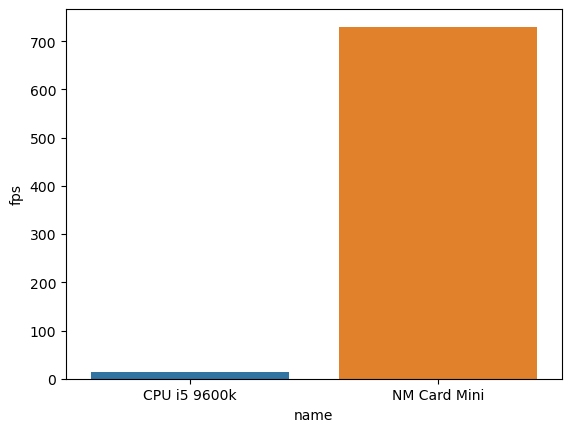

In [47]:
sns.barplot(x='name', y='fps', data=data)

In [75]:
list_fps_price = ({"name":"CPU", "kf(рублей)":"1428"} ,{"name":"Nm Card Mini", "kf(рублей)":"136"})
new_data = pd.DataFrame(list_fps_price)
new_data['name'] = new_data['name'].astype(str)
new_data['kf(рублей)'] = new_data['kf(рублей)'].astype(float)

<Axes: xlabel='name', ylabel='kf(рублей)'>

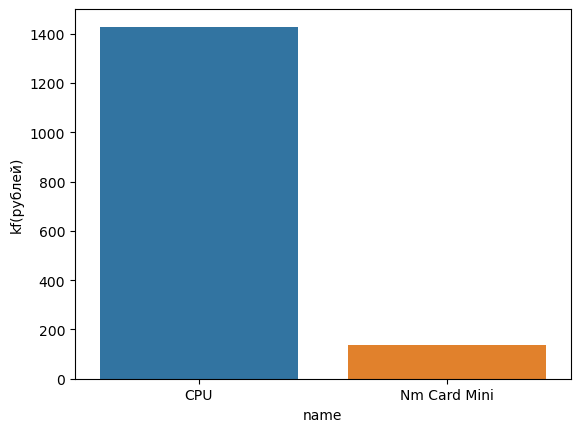

In [76]:
sns.barplot(x='name', y='kf(рублей)', data=new_data)